#  Exploratory Data Analysis

Data Understanding

Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.

Verify data quality: How clean/dirty is the data? Document any quality issues.

In [1]:
#Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

In [2]:
# Read the CSV back into a DataFrame
try:
    df_raw = pd.read_csv('data/row_data.csv')
    print("Data loaded successfully from CSV.")
except Exception as e:
    print(f"""Error reading CSV into DataFrame, 
          Check 01_Predict_Students_Dropout_Get_Raw_Data notebook: {e}""")
    raise

In [93]:
#print columns
df_raw.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [94]:
# Display the df_raw DataFrame
display(df_raw.head(10))  # Display the df_raw DataFrame in a Jupyter Notebook or interactive environment

# Check the shape of the df_raw DataFrame to see the number of rows and columns
df_raw.shape  # Returns a tuple representing the dimensionality of the DataFrame (number of rows, number of columns)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


(4424, 37)

In [95]:
# Set pandas display options to show all columns, rows, and full column widths
pd.options.display.max_columns = None  # Show all columns when displaying DataFrames
pd.options.display.max_rows = None  # Show all rows when displaying DataFrames
pd.options.display.max_colwidth = None  # Show full column widths when displaying DataFrames

# Function to annotate a seaborn bar plot with the height of each bar
def annotate_bar_plot(barplot, fontsize=12, num_type=float):
    # Loop over each bar in the bar plot
    for bar in barplot.patches:
        # Calculate the position to place the annotation (centered at the top of each bar)
        position = (bar.get_x() + bar.get_width() / 2, bar.get_height())
        # Format the height value to be displayed as text
        text = f'{bar.get_height():.2f}' if num_type == float else f'{bar.get_height():g}'
        # Annotate the bar with the formatted height value
        barplot.annotate(
            text=text,  # Text to display
            xy=position,  # Position to place the annotation
            ha='center',  # Center the text horizontally
            va='center',  # Center the text vertically
            size=fontsize,  # Font size of the annotation text
            xytext=(0, 8),  # Offset the text slightly above the bar
            textcoords='offset points'  # Use offset points for the text position
        )

# Set the color palette for seaborn plots to 'Set2'
palette = sns.color_palette('Set2')

In [96]:
# Convert all column names in df_raw to lowercase
df_raw.columns = [x.lower() for x in df_raw.columns]

In [97]:
df_raw.columns

Index(['marital status', 'application mode', 'application order', 'course',
       'daytime/evening attendance', 'previous qualification',
       'previous qualification (grade)', 'nacionality',
       'mother's qualification', 'father's qualification',
       'mother's occupation', 'father's occupation', 'admission grade',
       'displaced', 'educational special needs', 'debtor',
       'tuition fees up to date', 'gender', 'scholarship holder',
       'age at enrollment', 'international',
       'curricular units 1st sem (credited)',
       'curricular units 1st sem (enrolled)',
       'curricular units 1st sem (evaluations)',
       'curricular units 1st sem (approved)',
       'curricular units 1st sem (grade)',
       'curricular units 1st sem (without evaluations)',
       'curricular units 2nd sem (credited)',
       'curricular units 2nd sem (enrolled)',
       'curricular units 2nd sem (evaluations)',
       'curricular units 2nd sem (approved)',
       'curricular units 2nd s

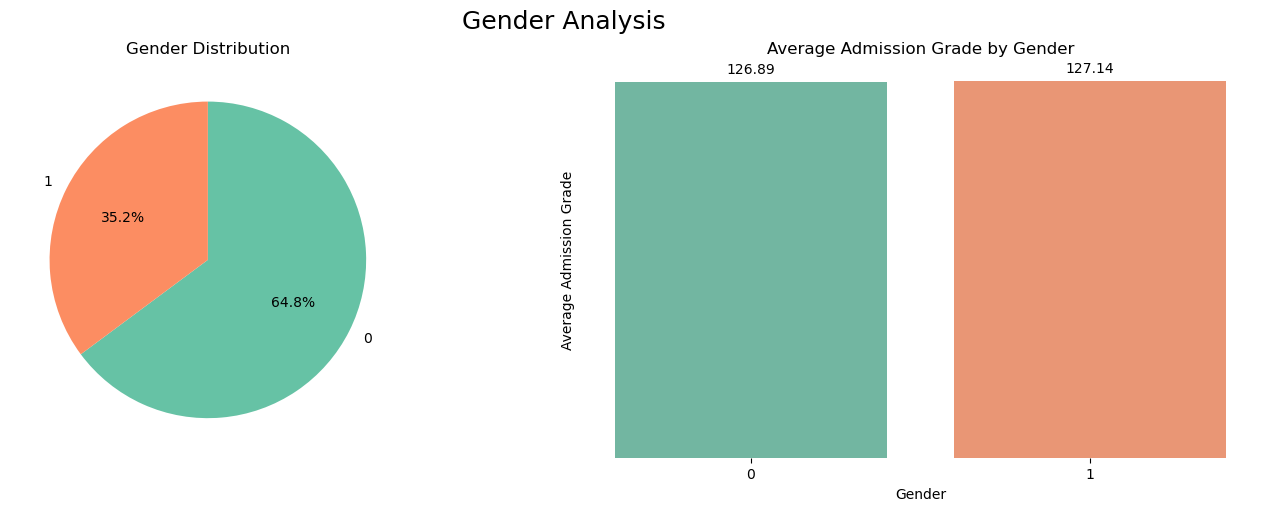

,marital status,application mode,application order,course,daytime/evening attendance,previous qualification,previous qualification (grade),nacionality,mother's qualification,father's qualification,mother's occupation,father's occupation,admission grade,displaced,educational special needs,debtor,tuition fees up to date,gender,scholarship holder,age at enrollment,international,curricular units 1st sem (credited),curricular units 1st sem (enrolled),curricular units 1st sem (evaluations),curricular units 1st sem (approved),curricular units 1st sem (grade),curricular units 1st sem (without evaluations),curricular units 2nd sem (credited),curricular units 2nd sem (enrolled),curricular units 2nd sem (evaluations),curricular units 2nd sem (approved),curricular units 2nd sem (grade),curricular units 2nd sem (without evaluations),unemployment rate,inflation rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [99]:
# Compute the percentage of each gender
data = df_raw['gender'].value_counts(normalize=True) * 100

# Create a figure for the plots
fig = plt.figure(figsize=(14, 5), constrained_layout=True)

# Plot the pie chart for gender distribution
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Gender Distribution')

# Compute the average admission grade by gender
data = df_raw.groupby('gender')['admission grade'].mean().sort_values(ascending=False)

# Plot the bar chart for average admission grades by gender
plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=sns.color_palette('Set2'))
for p in bp.patches:
    bp.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')
plt.xlabel('Gender')
plt.ylabel('Average Admission Grade')
plt.yticks([])
plt.box(False)
plt.title('Average Admission Grade by Gender')

# Set the overall title for the figure
fig.suptitle('Gender Analysis', fontsize=18)

# Display the plots
plt.show()
display(df_raw.head(10))


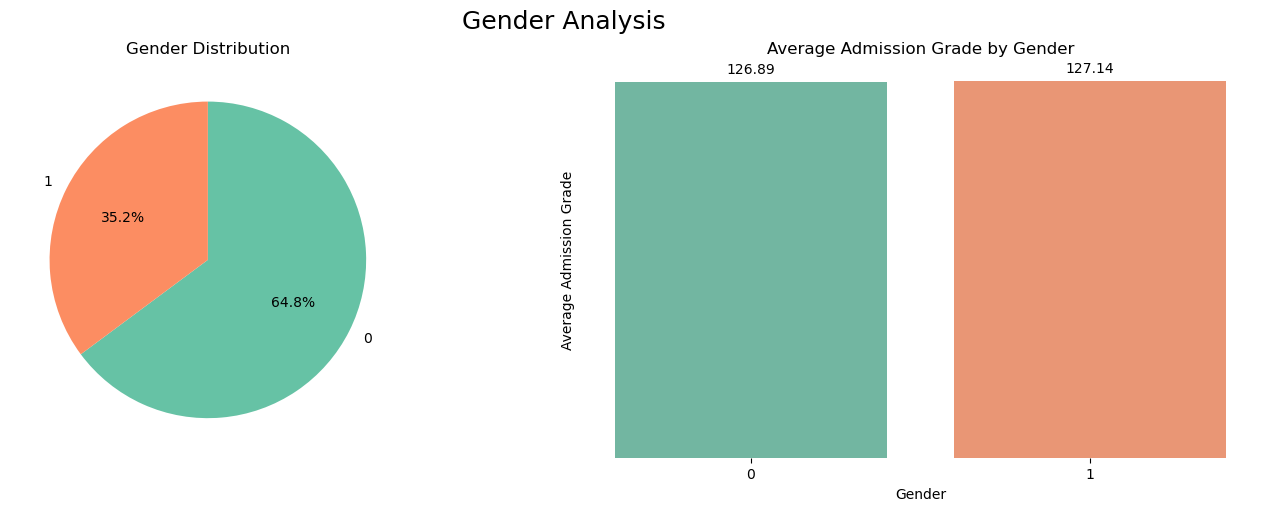

,marital status,application mode,application order,course,daytime/evening attendance,previous qualification,previous qualification (grade),nacionality,mother's qualification,father's qualification,mother's occupation,father's occupation,admission grade,displaced,educational special needs,debtor,tuition fees up to date,gender,scholarship holder,age at enrollment,international,curricular units 1st sem (credited),curricular units 1st sem (enrolled),curricular units 1st sem (evaluations),curricular units 1st sem (approved),curricular units 1st sem (grade),curricular units 1st sem (without evaluations),curricular units 2nd sem (credited),curricular units 2nd sem (enrolled),curricular units 2nd sem (evaluations),curricular units 2nd sem (approved),curricular units 2nd sem (grade),curricular units 2nd sem (without evaluations),unemployment rate,inflation rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_raw is already defined and processed

# Compute the percentage of each gender
gender_distribution = df_raw['gender'].value_counts(normalize=True) * 100

# Create a figure for the plots
fig = plt.figure(figsize=(14, 5), constrained_layout=True)

# Plot the pie chart for gender distribution
plt.subplot(121)
plt.pie(gender_distribution, labels=gender_distribution.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Gender Distribution')

# Compute the average admission grade by gender
average_admission_grade = df_raw.groupby('gender')['admission grade'].mean().sort_values(ascending=False)

# Plot the bar chart for average admission grades by gender
plt.subplot(122)
bp = sns.barplot(x=average_admission_grade.index, y=average_admission_grade, palette=sns.color_palette('Set2'))
for p in bp.patches:
    bp.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')
plt.xlabel('Gender')
plt.ylabel('Average Admission Grade')
plt.yticks([])
plt.box(False)
plt.title('Average Admission Grade by Gender')

# Set the overall title for the figure
fig.suptitle('Gender Analysis', fontsize=18)

# Display the plots
plt.show()

# Display the first 10 rows of the DataFrame to verify the changes
display(df_raw.head(10))
